In [1]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from neuralnetwork import NeuralNetwork

In [ ]:
# Run only if you need to install nltk.corpus and nltk.stem
nltk.download()

In [2]:
# Read the data set and parse independent lines
fd = open("Assignment_2_data.txt","r")
file_data = fd.read()
lines = (file_data).splitlines()

In [3]:
# Create Necessary objects
ps = PorterStemmer()
y_target_names = []
x = []
stop_words = set(stopwords.words('english'))
unique_tokens = set()

In [4]:
# Pasing input file into labels and features 
for i in range(len(lines)): 
    # Splitting based on white space and non alpha numberic characters
    words_tokens = re.split('\W+',lines[i])
    words_tokens = list(filter(lambda temp: (temp != '' ),words_tokens)) 
    
    # Removing stop word from the data
    filtered_sentence = []
    for w in words_tokens:
        if w not in stop_words:
        # Applying porter stemmer
            stemmed_word = ps.stem(w).lower()
            filtered_sentence.append(stemmed_word)


    # Store pre processed data in x and y_target_names
    y_target_names.append(filtered_sentence[0])
    x.append(filtered_sentence[1:])
    unique_tokens.update(filtered_sentence[1:])

In [5]:
# Declare variables for one hot encoding
N = len(x)
unique_tokens = list(unique_tokens)
encoding_length = (len(unique_tokens))
x_encoded = np.zeros( ( N , encoding_length) )


In [6]:
# Binary encoding of features and labels
for i in range(N):
    for j in x[i]:
        ind = unique_tokens.index(j)
        x_encoded[i][ind] = 1;
        
y_target = np.zeros((N,1))
for i in range(len(y_target_names)):
    if(y_target_names[i] == "ham"):
        y_target[i] = 1

In [7]:
# Split training and test error
trainN = int(0.8*N)

X_train = x_encoded[0:trainN]
y_train = y_target[0:trainN]

X_test = x_encoded[trainN:]
y_test = y_target[trainN:]

In [8]:
N,M = X_train.shape

In [9]:
# Using tanh activation function
nn = NeuralNetwork(M,np.array([100,50]),1)

In [ ]:
nn.train(X_train,y_train,X_test,y_test,epochs=100,learning_rate=1e-1,learning_rate_decay=0.98)

-----------Ratio of Correct predictions over testset(507/1115)-----------
-----------Ratio of Correct predictions over testset(507/1115)-----------
-----------Ratio of Correct predictions over training set(2040/4459)-----------
-----------Ratio of Correct predictions over training set(2040/4459)-----------
Epoch (1/100) Training Error : 0.460027
Epoch (1/100) Training Error : 0.460027
Epoch (2/100) Training Error : 0.419348
Epoch (2/100) Training Error : 0.419348
Epoch (3/100) Training Error : 0.376944
Epoch (3/100) Training Error : 0.376944
Epoch (4/100) Training Error : 0.330344
Epoch (4/100) Training Error : 0.330344
Epoch (5/100) Training Error : 0.285475
Epoch (5/100) Training Error : 0.285475
Epoch (6/100) Training Error : 0.247060
Epoch (6/100) Training Error : 0.247060
Epoch (7/100) Training Error : 0.216347
Epoch (7/100) Training Error : 0.216347
Epoch (8/100) Training Error : 0.192381
Epoch (8/100) Training Error : 0.192381
Epoch (9/100) Training Error : 0.173585
Epoch (9/100

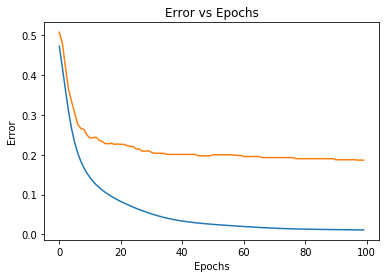

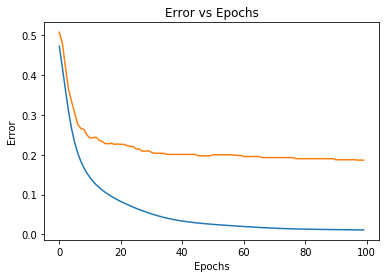

In [11]:
nn.plot()

In [12]:
nn2 = NeuralNetwork(M,np.array([100,50]),2)

In [13]:
nn2.train(X_train,y_train,X_test,y_test,epochs=100,learning_rate=1.5e-1,learning_rate_decay=0.98,method="two")

-----------Ratio of Correct predictions over testset(957/1115)-----------
-----------Ratio of Correct predictions over testset(957/1115)-----------
-----------Ratio of Correct predictions over training set(3822/4459)-----------
-----------Ratio of Correct predictions over training set(3822/4459)-----------
Epoch (1/100) Training Error : 0.506761
Epoch (1/100) Training Error : 0.506761
Epoch (2/100) Training Error : 0.495649
Epoch (2/100) Training Error : 0.495649
Epoch (3/100) Training Error : 0.486296
Epoch (3/100) Training Error : 0.486296
Epoch (4/100) Training Error : 0.476585
Epoch (4/100) Training Error : 0.476585
Epoch (5/100) Training Error : 0.465509
Epoch (5/100) Training Error : 0.465509
Epoch (6/100) Training Error : 0.452417
Epoch (6/100) Training Error : 0.452417
Epoch (7/100) Training Error : 0.436841
Epoch (7/100) Training Error : 0.436841
Epoch (8/100) Training Error : 0.418583
Epoch (8/100) Training Error : 0.418583
Epoch (9/100) Training Error : 0.397910
Epoch (9/100

Epoch (86/100) Training Error : 0.158521
Epoch (87/100) Training Error : 0.158334
Epoch (87/100) Training Error : 0.158334
Epoch (88/100) Training Error : 0.158154
Epoch (88/100) Training Error : 0.158154
Epoch (89/100) Training Error : 0.157980
Epoch (89/100) Training Error : 0.157980
Epoch (90/100) Training Error : 0.157813
Epoch (90/100) Training Error : 0.157813
Epoch (91/100) Training Error : 0.157652
Epoch (91/100) Training Error : 0.157652
Epoch (92/100) Training Error : 0.157496
Epoch (92/100) Training Error : 0.157496
Epoch (93/100) Training Error : 0.157346
Epoch (93/100) Training Error : 0.157346
Epoch (94/100) Training Error : 0.157201
Epoch (94/100) Training Error : 0.157201
Epoch (95/100) Training Error : 0.157060
Epoch (95/100) Training Error : 0.157060
Epoch (96/100) Training Error : 0.156924
Epoch (96/100) Training Error : 0.156924
Epoch (97/100) Training Error : 0.156792
Epoch (97/100) Training Error : 0.156792
Epoch (98/100) Training Error : 0.156664
Epoch (98/100) T

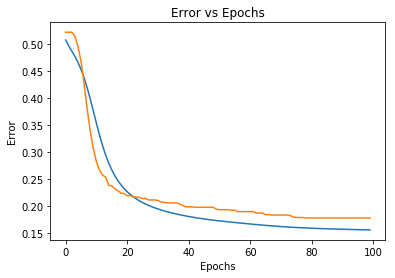

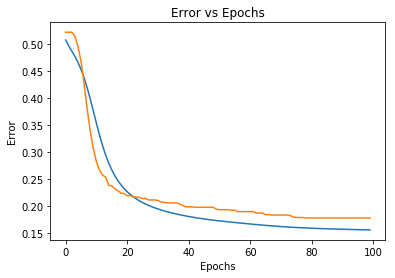

In [14]:
nn2.plot()

In [16]:
# Using sigmoid activation function
nn = NeuralNetwork(M,np.array([100,50]),1,activation_function="sigmoid",weight_scale=1)

In [17]:
nn.train(X_train,y_train,X_test,y_test,epochs=10,learning_rate=1e-3,learning_rate_decay=0.98)

-----------Ratio of Correct predictions over testset(781/1115)-----------
-----------Ratio of Correct predictions over testset(781/1115)-----------
-----------Ratio of Correct predictions over training set(3081/4459)-----------
-----------Ratio of Correct predictions over training set(3081/4459)-----------
Epoch (1/10) Training Error : 0.235056
Epoch (1/10) Training Error : 0.235056
Epoch (2/10) Training Error : 0.234625
Epoch (2/10) Training Error : 0.234625
Epoch (3/10) Training Error : 0.234196
Epoch (3/10) Training Error : 0.234196
Epoch (4/10) Training Error : 0.233769
Epoch (4/10) Training Error : 0.233769
Epoch (5/10) Training Error : 0.233345
Epoch (5/10) Training Error : 0.233345
Epoch (6/10) Training Error : 0.232923
Epoch (6/10) Training Error : 0.232923
Epoch (7/10) Training Error : 0.232504
Epoch (7/10) Training Error : 0.232504
Epoch (8/10) Training Error : 0.232087
Epoch (8/10) Training Error : 0.232087
Epoch (9/10) Training Error : 0.231673
Epoch (9/10) Training Error :

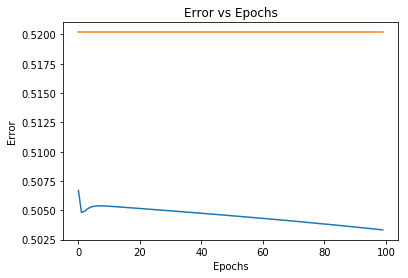

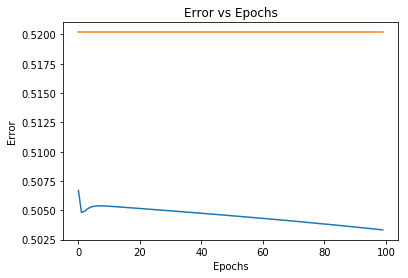

In [17]:
nn.plot()

In [18]:
nn = NeuralNetwork(M,np.array([100,50]),2,activation_function="sigmoid")

In [19]:
nn.train(X_train,y_train,X_test,y_test,epochs=100,learning_rate=1e-1,learning_rate_decay=0.98,method="two")

-----------Ratio of Correct predictions over testset(970/1115)-----------
-----------Ratio of Correct predictions over testset(970/1115)-----------
-----------Ratio of Correct predictions over training set(3857/4459)-----------
-----------Ratio of Correct predictions over training set(3857/4459)-----------
Epoch (1/100) Training Error : 0.504976
Epoch (1/100) Training Error : 0.504976
Epoch (2/100) Training Error : 0.505457
Epoch (2/100) Training Error : 0.505457
Epoch (3/100) Training Error : 0.505640
Epoch (3/100) Training Error : 0.505640
Epoch (4/100) Training Error : 0.505670
Epoch (4/100) Training Error : 0.505670
Epoch (5/100) Training Error : 0.505652
Epoch (5/100) Training Error : 0.505652
Epoch (6/100) Training Error : 0.505620
Epoch (6/100) Training Error : 0.505620
Epoch (7/100) Training Error : 0.505584
Epoch (7/100) Training Error : 0.505584
Epoch (8/100) Training Error : 0.505547
Epoch (8/100) Training Error : 0.505547
Epoch (9/100) Training Error : 0.505509
Epoch (9/100

KeyboardInterrupt: 

KeyboardInterrupt: 

In [ ]:
nn.plot()